## Домашнее задание от 07.03.2020 г. «Практическое занятие. Разбор кейсов реальных бизнесов. Поиск инсайтов в данных»
ФИО: Кривова Татьяна Сергеевна

**Датасет: Цены на недвижимость**. Для целей решения задач необходимо условное деление набора данных на категории по количеству комнат.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('House prices_ASB8.xlsx')

In [3]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
No           5000 non-null int64
Rooms        5000 non-null int64
DistMetro    5000 non-null int64
Area         5000 non-null int64
Price        5000 non-null int64
dtypes: int64(5)
memory usage: 195.4 KB


,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [4]:
dataset.Rooms.unique()
dataset.Rooms.value_counts()

array([3, 2, 1], dtype=int64)

2    1690
1    1657
3    1653
Name: Rooms, dtype: int64

In [5]:
# Разделим dataset по количеству комнат:

category_1 = dataset[dataset.Rooms == 1] # category_1.shape --> (1657, 5)
category_2 = dataset[dataset.Rooms == 2] # category_2.shape --> (1690, 5)
category_3 = dataset[dataset.Rooms == 3] # category_3.shape --> (1653, 5)

**Задание 1**. Построить гистограмму. Постройте гистограммы распределения цен для каждой категории (по количеству комнат).
Какие выводы можно сделать на основе полученных гистограмм?

In [6]:
import numpy as np

import scipy.stats as sts
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

(array([  1.,   2.,  16.,  19.,  38.,  66.,  74., 107., 124., 161., 159.,
        180., 146., 133., 106., 103.,  69.,  49.,  38.,  28.,  19.,  13.,
          3.,   2.,   1.]),
 array([2825.  , 3045.64, 3266.28, 3486.92, 3707.56, 3928.2 , 4148.84,
        4369.48, 4590.12, 4810.76, 5031.4 , 5252.04, 5472.68, 5693.32,
        5913.96, 6134.6 , 6355.24, 6575.88, 6796.52, 7017.16, 7237.8 ,
        7458.44, 7679.08, 7899.72, 8120.36, 8341.  ]),
 <a list of 25 Patch objects>)

Text(0, 0.5, 'Frequency')

(array([  1.,   2.,   5.,  10.,  25.,  59.,  74., 107., 114., 116., 142.,
        157., 140., 152., 153., 108., 116.,  75.,  45.,  39.,  28.,   7.,
         10.,   3.,   2.]),
 array([ 4427.  ,  4763.24,  5099.48,  5435.72,  5771.96,  6108.2 ,
         6444.44,  6780.68,  7116.92,  7453.16,  7789.4 ,  8125.64,
         8461.88,  8798.12,  9134.36,  9470.6 ,  9806.84, 10143.08,
        10479.32, 10815.56, 11151.8 , 11488.04, 11824.28, 12160.52,
        12496.76, 12833.  ]),
 <a list of 25 Patch objects>)

Text(0.5, 1.0, 'Гистограммы распределения цен для каждой категории (по количеству комнат: 1, 2 и 3-к.)')

(array([  2.,   6.,   9.,  19.,  42.,  55.,  66.,  97., 138., 123., 153.,
        156., 156.,  98., 116., 107.,  88.,  76.,  43.,  34.,  29.,  17.,
          8.,  10.,   5.]),
 array([ 6338.  ,  6789.04,  7240.08,  7691.12,  8142.16,  8593.2 ,
         9044.24,  9495.28,  9946.32, 10397.36, 10848.4 , 11299.44,
        11750.48, 12201.52, 12652.56, 13103.6 , 13554.64, 14005.68,
        14456.72, 14907.76, 15358.8 , 15809.84, 16260.88, 16711.92,
        17162.96, 17614.  ]),
 <a list of 25 Patch objects>)

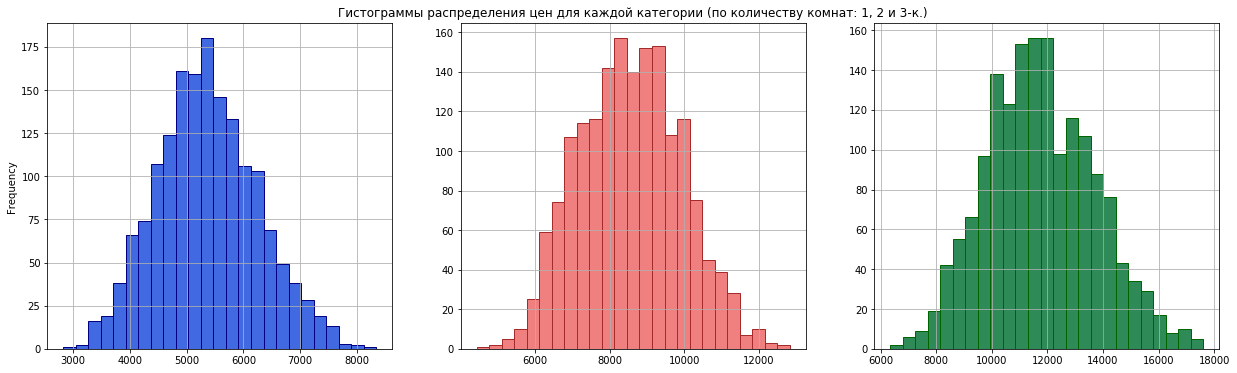

In [7]:
rcParams['figure.figsize'] = 21,6
fig = plt.figure() # Графики для параметра Price

ax1 = fig.add_subplot(1,3,1)
ax1.hist(category_1.Price, bins=25, color='royalblue', edgecolor='navy', linewidth=1.0)
ax1.grid(True)
plt.ylabel('Frequency')

ax2 = fig.add_subplot(1,3,2)
ax2.hist(category_2.Price, bins=25, color='lightcoral', edgecolor='brown', linewidth=1.0)
ax2.grid(True)
plt.title('Гистограммы распределения цен для каждой категории (по количеству комнат: 1, 2 и 3-к.)')

ax3 = fig.add_subplot(1,3,3)
ax3.hist(category_3.Price, bins=25, color='seagreen', edgecolor='darkgreen', linewidth=1.0)
ax3.grid(True)

plt.show()

*Полученные графики визуально похожи на нормальное распределение. Далее сделаем проверки:* 

*sts.normaltest - tests the null hypothesis that a sample comes from a normal distribution;*

*sts.skewtest - tests the null hypothesis that the skewness (асимметрия/перекос) of the population that the sample was drawn from is the same as that of a corresponding normal distribution;*

*sts.kurtosistest - tests the null hypothesis that the kurtosis (эксцесс) of the population from which the sample was drawn is that of the normal distribution.*

*На графиках видны интервалы цен и объем предложений (количество квартир по категориям).*
*Также сравним основные статистики для каждой категории недвижимости:*

In [8]:
# Основные статистики для 1-к.
category_1.Price.describe()

count    1657.000000
mean     5363.285456
std       883.462694
min      2825.000000
25%      4758.000000
50%      5328.000000
75%      5951.000000
max      8341.000000
Name: Price, dtype: float64

In [9]:
# Основные статистики для 2-к.
category_2.Price.describe()

count     1690.000000
mean      8547.268047
std       1369.580793
min       4427.000000
25%       7531.500000
50%       8534.500000
75%       9525.750000
max      12833.000000
Name: Price, dtype: float64

In [10]:
# Основные статистики для 3-к.
category_3.Price.describe()

count     1653.000000
mean     11749.978221
std       1959.611884
min       6338.000000
25%      10320.000000
50%      11639.000000
75%      13123.000000
max      17614.000000
Name: Price, dtype: float64

*Сравним Средние значения mean: category_1 (5363.285456) < category_2 (8547.268047) < category_3 (11749.978221)*

*Сравним Стандартные отклонения std: category_1 (883.462694) < category_2 (1369.580793) < category_3 (1959.611884)*

Text(0.5, 1.0, 'Частотный график для 1-к. (sns.distplot)')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

(2700, 8400)

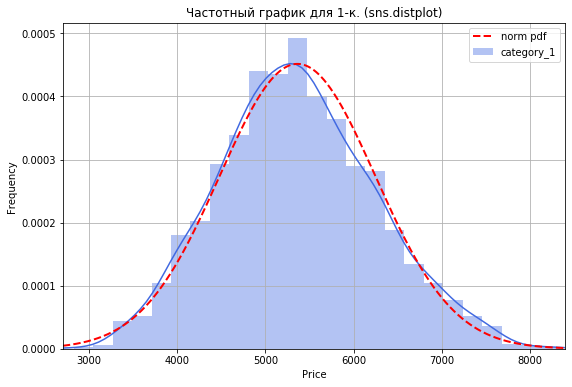

In [11]:
rcParams['figure.figsize'] = 9,6
# Частотный график для 1-к. и сравнение с нормальным распределением
sns.distplot(category_1.Price, bins=25, color="royalblue", label='category_1')

plt.title('Частотный график для 1-к. (sns.distplot)')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(2700,8400)

mu = round(statistics.mean(category_1.Price), 3) # Среднее значение
sigma = round(statistics.stdev(category_1.Price), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(2700,8400,1000) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()

In [12]:
sts.normaltest(category_1.Price), sts.skewtest(category_1.Price), sts.kurtosistest(category_1.Price)
#т.к. pvalue в NormaltestResult < 0.05 ==> category_1.Price не соответствует нормальному распределению

x = sts.norm.rvs(loc=mu, scale=sigma, size=500) # проверка
sts.normaltest(x), sts.skewtest(x), sts.kurtosistest(x)

(NormaltestResult(statistic=14.110992074713494, pvalue=0.0008626547219689426),
 SkewtestResult(statistic=3.3875038675531335, pvalue=0.0007053172275735763),
 KurtosistestResult(statistic=-1.623517669145013, pvalue=0.10447878935205498))

(NormaltestResult(statistic=1.3612053811366127, pvalue=0.5063117510748102),
 SkewtestResult(statistic=0.32917526966958216, pvalue=0.7420232142102305),
 KurtosistestResult(statistic=-1.1193073853837339, pvalue=0.2630090261800845))

Text(0.5, 1.0, 'Частотный график для 2-к. (sns.distplot)')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

(4400, 12900)

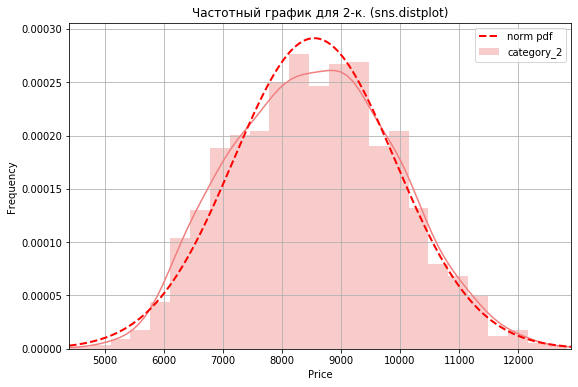

In [13]:
# Частотный график для 2-к. и сравнение с нормальным распределением
sns.distplot(category_2.Price, bins=25, color="lightcoral", label='category_2')

plt.title('Частотный график для 2-к. (sns.distplot)')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(4400,12900)

mu = round(statistics.mean(category_2.Price), 3) # Среднее значение
sigma = round(statistics.stdev(category_2.Price), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(4400,12900,2000) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()

In [14]:
sts.normaltest(category_2.Price), sts.skewtest(category_2.Price), sts.kurtosistest(category_2.Price)
#т.к. pvalue в NormaltestResult < 0.05 ==> category_2.Price не соответствует нормальному распределению

x = sts.norm.rvs(loc=mu, scale=sigma, size=500) # проверка
sts.normaltest(x), sts.skewtest(x), sts.kurtosistest(x)

(NormaltestResult(statistic=22.448512341005518, pvalue=1.334650279306321e-05),
 SkewtestResult(statistic=1.439584129044409, pvalue=0.14998509248417338),
 KurtosistestResult(statistic=-4.513990460380811, pvalue=6.361907973699982e-06))

(NormaltestResult(statistic=0.4296465081510447, pvalue=0.806684005688366),
 SkewtestResult(statistic=-0.6491448746850829, pvalue=0.5162447387649244),
 KurtosistestResult(statistic=-0.09087045626127771, pvalue=0.9275955255318169))

Text(0.5, 1.0, 'Частотный график для 3-к. (sns.distplot)')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Frequency')

(6300, 17700)

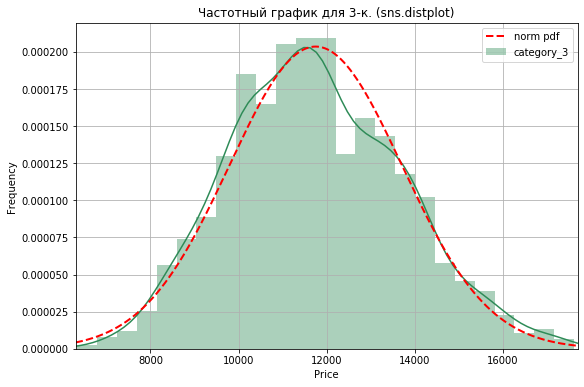

In [15]:
# Частотный график для 3-к. и сравнение с нормальным распределением
sns.distplot(category_3.Price, bins=25, color="seagreen", label='category_3')

plt.title('Частотный график для 3-к. (sns.distplot)')
plt.grid(True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(6300,17700)

mu = round(statistics.mean(category_3.Price), 3) # Среднее значение
sigma = round(statistics.stdev(category_3.Price), 3) # Стандартное отклонение

norm_rv = sts.norm(loc=mu, scale=sigma) # Random variates
x = np.linspace(6300,17700,2000) 
pdf = norm_rv.pdf(x) # Probability density function

plt.plot(x, pdf, color='red', linestyle='dashed', linewidth=2, label='norm pdf') # График нормального распределения
plt.legend()

In [16]:
sts.normaltest(category_3.Price), sts.skewtest(category_3.Price), sts.kurtosistest(category_3.Price)
#т.к. pvalue в NormaltestResult < 0.05 ==> category_3.Price не соответствует нормальному распределению

x = sts.norm.rvs(loc=mu, scale=sigma, size=500) # проверка
sts.normaltest(x), sts.skewtest(x), sts.kurtosistest(x)

(NormaltestResult(statistic=18.893774978160177, pvalue=7.893486896015436e-05),
 SkewtestResult(statistic=3.789497553384616, pvalue=0.00015095229811400921),
 KurtosistestResult(statistic=-2.129197799889007, pvalue=0.03323789886231242))

(NormaltestResult(statistic=1.6470695885776336, pvalue=0.4388775675161084),
 SkewtestResult(statistic=-0.9925448254189501, pvalue=0.3209318243706012),
 KurtosistestResult(statistic=-0.8135873389573486, pvalue=0.41588139347978326))

**Задание 2**. Оценить корреляцию. Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Точечный график зависимости Area и Price для каждой категории (по количеству комнат: 1, 2 и 3-к.)')

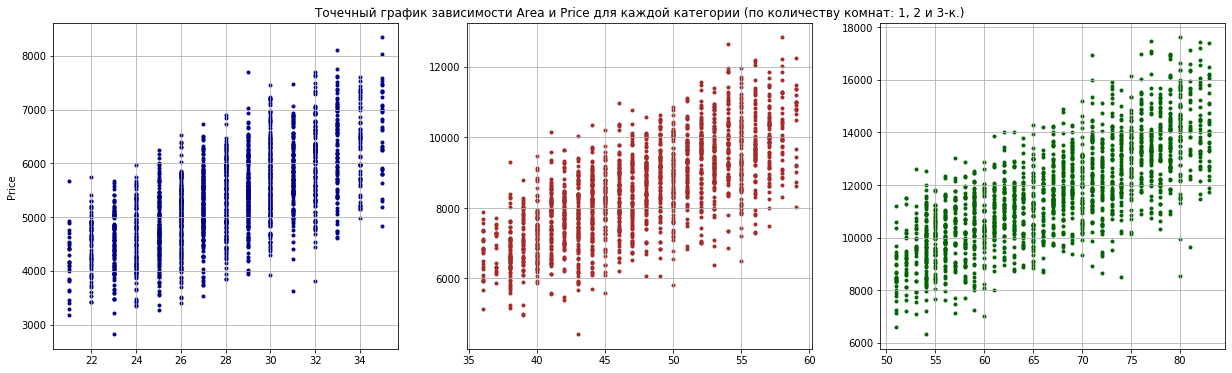

In [17]:
# Посмотрим корреляцию графически

rcParams['figure.figsize'] = 21,6
fig = plt.figure() # Графики для параметров Area и Price

ax1 = fig.add_subplot(1,3,1)
ax1.scatter(category_1.Area, category_1.Price, color="darkblue", marker=".")
ax1.grid(True)
plt.ylabel('Price')

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(category_2.Area, category_2.Price, color="brown", marker=".")
ax2.grid(True)
plt.title('Точечный график зависимости Area и Price для каждой категории (по количеству комнат: 1, 2 и 3-к.)')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(category_3.Area, category_3.Price, color="darkgreen", marker=".")
ax3.grid(True)

plt.show()

In [18]:
# Оценим корреляцию математически: посчитаем коэффициент Пирсона для каждой категории.

# коэффициент Пирсона для 1-к.
sts.pearsonr(category_1.Area, category_1.Price)

# коэффициент Пирсона для 2-к.
sts.pearsonr(category_2.Area, category_2.Price)

# коэффициент Пирсона для 3-к.
sts.pearsonr(category_3.Area, category_3.Price)

(0.6528312289899473, 7.22443477619161e-202)

(0.7058155230162519, 5.069577611715952e-255)

(0.7447234199703188, 2.8421949235510374e-292)

*Положительный знак коэффициента Пирсона означает, что при возрастании x возрастает y. Числовое значение означает, насколько сильно коррелируют данные: чем ближе к единице, тем выше (линейная) корреляция.*

*Сравним полученные Корреляции: category_1 (65.3 %) < category_2 (70.6 %) < category_3 (74.5 %)*

*Соответственно, во всех трех категориях при возрастании Area возрастает и Price. Сильнее всего корреляция у 3-к.*

**Задание 3**. Рассчитать квартили. Рассчитайте границы квартилей распределения цен на 2х квартиры площадью более 40 кв. метров.

In [19]:
sample_2_40 = category_2[category_2.Area > 40] # выборка 2-х комн. квартиры площадью более 40 кв. метров

sample_2_40.shape
sample_2_40.head()

(1446, 5)

,No,Rooms,DistMetro,Area,Price
1,2,2,4,54,9785
3,4,2,8,48,9123
7,8,2,12,52,7908
9,10,2,5,46,8047
15,16,2,0,49,10305


In [20]:
sample_2_40.Price.describe()[4:7] # границы квартилей

25%    7924.0
50%    8812.0
75%    9684.5
Name: Price, dtype: float64

Text(0.5, 1.0, 'График ящик с усами для параметра Price (sns.boxplot)')

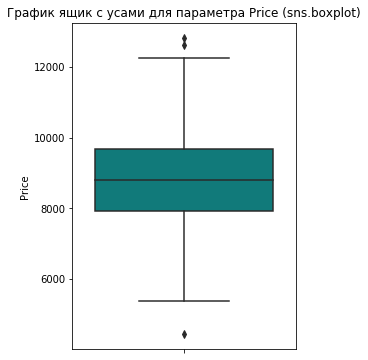

In [21]:
rcParams['figure.figsize'] = 4,6
sns.boxplot(y=sample_2_40.Price, color="darkcyan")

plt.title('График ящик с усами для параметра Price (sns.boxplot)')

**Задание 4**. Решить задачу. Вы являетесь риелтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс. *В каждой категории разная степень корреляции. Т.е. у 3 комнатных она может быть иная, чем у однокомнатных.*

In [22]:
category_3.head()
category_3.Price.describe()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
5,6,3,19,65,11318
6,7,3,13,69,11301
8,9,3,3,68,13279
10,11,3,18,63,11653


count     1653.000000
mean     11749.978221
std       1959.611884
min       6338.000000
25%      10320.000000
50%      11639.000000
75%      13123.000000
max      17614.000000
Name: Price, dtype: float64

*Если продажи будут по средней цене 11749.978221, то прибыль от 25 сделок составит: 8 млн. 812 тыс.*

*По условию нужно определить вероятность, что суммарная прибыль превысит 9 млн. 200 тыс. Это означает, что средняя цена продажи должна превысить: 12266.7*

In [23]:
X_avg_fact = statistics.mean(category_3.Price) # средняя цена 3-к. квартир в тыс.руб.

# 9 млн.200 тыс. - это плановые (желаемые) 3% от общей стоимости продаж 25 квартир
mu_plan = (92*10**4)/(3*25) # плановое, гипотетическое значение средней продажи

sigma = statistics.stdev(category_3.Price) 

In [24]:
X_avg_fact
mu_plan
sigma

11749.978221415608

12266.666666666666

1959.6118842295127

In [25]:
Z_test = (X_avg_fact - mu_plan)/(sigma/np.sqrt(25))
Z_test

-1.3183438246349786

In [26]:
sts.t.cdf(Z_test, df=mu_plan)*100 # вероятность в процентах

9.370659589597503

**Задание 5**. Решить задачу. Рассчитать дисперсию стоимости кв.метра в каждой категории. Как меняется дисперсия с количеством комнат? Есть ли (и какая) связь с изменением коэффициента корреляции?

In [27]:
category_1['price_per_m2'] = category_1.apply(lambda row: row.Price/row.Area, axis=1)
category_2['price_per_m2'] = category_2.apply(lambda row: row.Price/row.Area, axis=1)
category_3['price_per_m2'] = category_3.apply(lambda row: row.Price/row.Area, axis=1)

category_1.head()
category_2.head()
category_3.head()

E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\ipykernel_launcher.py:3: Sett

,No,Rooms,DistMetro,Area,Price,price_per_m2
2,3,1,2,31,5783,186.548387
4,5,1,11,31,5662,182.645161
11,12,1,14,25,4206,168.240000
13,14,1,11,24,4703,195.958333
18,19,1,2,30,6488,216.266667


,No,Rooms,DistMetro,Area,Price,price_per_m2
1,2,2,4,54,9785,181.203704
3,4,2,8,48,9123,190.062500
7,8,2,12,52,7908,152.076923
9,10,2,5,46,8047,174.934783
15,16,2,0,49,10305,210.306122


,No,Rooms,DistMetro,Area,Price,price_per_m2
0,1,3,12,56,9396,167.785714
5,6,3,19,65,11318,174.123077
6,7,3,13,69,11301,163.782609
8,9,3,3,68,13279,195.279412
10,11,3,18,63,11653,184.968254


In [28]:
d1 = statistics.variance(category_1.price_per_m2) # Дисперсия для 1-к.

d2 = statistics.variance(category_2.price_per_m2) # Дисперсия для 2-к.

d3 = statistics.variance(category_3.price_per_m2) # Дисперсия для 3-к.

round(d1, 3)
round(d2, 3)
round(d3, 3)

580.093

420.135

381.649

*Сравним Дисперсии variance: category_1 (580.093) > category_2 (420.135) > category_3 (381.649)*

*Вывод: с увеличением количества комнат дисперсия цены кв. метра уменьшается.*

In [29]:
variance_list = [d1, d2, d3]
corr_list = [sts.pearsonr(category_1.Area, category_1.Price)[0],\
             sts.pearsonr(category_2.Area, category_2.Price)[0],\
             sts.pearsonr(category_3.Area, category_3.Price)[0]]

variance_list
corr_list

[580.0932409185209, 420.13502667698214, 381.64918080343705]

[0.6528312289899473, 0.7058155230162519, 0.7447234199703188]

In [30]:
slope, intercept, r_value, p_value, std_err = sts.linregress(variance_list,corr_list)

slope, intercept
p_value, std_err

x1 = np.linspace(350, 600)
y1 = slope*x1+intercept # Регрессионная прямая

(-0.00042451549525912607, 0.8966661871236705)

(0.16010871889386835, 0.00010907433286927357)

Text(0.5, 0, 'variance: Price/Area')

Text(0, 0.5, 'pearsonr: Price & Area')

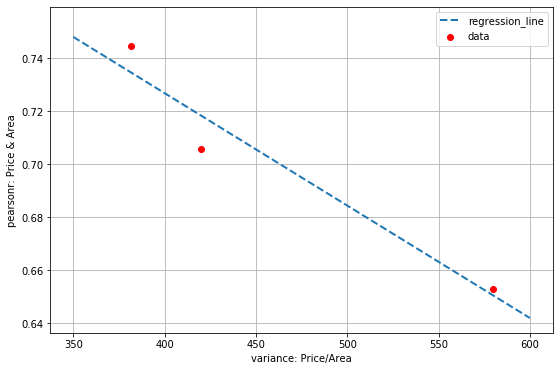

In [31]:
# Посмотрим графически на связь дисперсии и изменения коэффициента корреляции

rcParams['figure.figsize'] = 9,6
plt.scatter(variance_list, corr_list, c='red', label='data')
plt.plot(x1, y1, '--', linewidth=2, label='regression_line')

plt.grid(True)
plt.xlabel('variance: Price/Area')
plt.ylabel('pearsonr: Price & Area')
plt.legend()